# k-means clustering


In [145]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42,cluster_std=1)

# , columns = ["x1", "x2", "label"])
df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.head()


,0,1,2
0,-7.689054,6.620346,3.0
1,-9.576514,-6.934404,2.0
2,6.829682,1.164871,1.0
3,-2.901306,7.550771,0.0
4,-5.678413,-7.288185,2.0


In [146]:
df.columns = ["x1", "x2", "label"]
df["label"]= df['label'].astype(int)
df.head()


,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


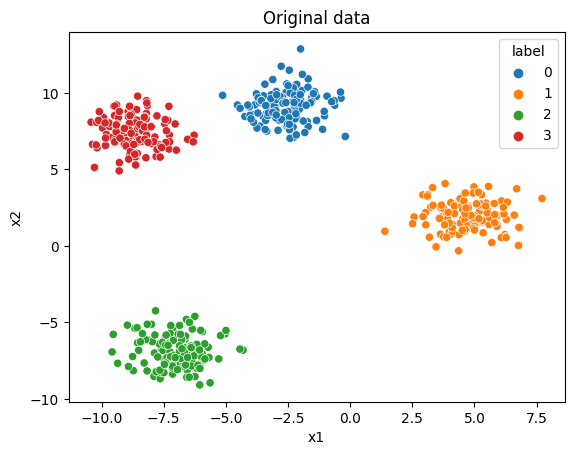

In [147]:
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original data");

In [148]:
# we don't have labels in unsupervised learning
# in this simulation we drop the label, but for real world data there is no label in beginning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


### Feature scaling
- need to scale dataset with either feature standardization or normalization
- in unsupervised, as there is no label, we can use the whole dataset in scaling
- we don't divide into training and test dataset, instead we use the whole dataset

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

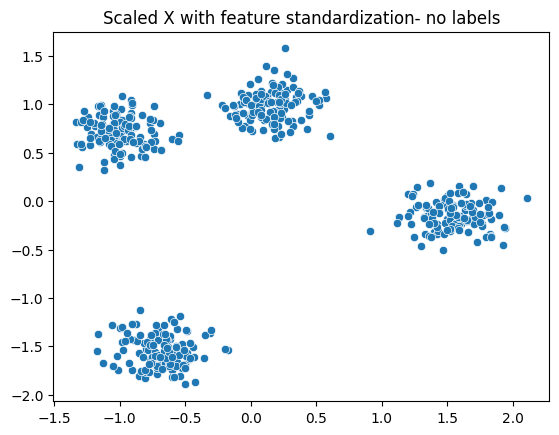

In [150]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization- no labels");

## k-means clustering
k-means clustering is an unsupervised learning algorithm, which means that there are no labels

- number of clusters are chosen
-  points are randomly selected as cluster centers
- the nearest points to each cluster center are classified as that cluster
- the center of the cluster is recalculated
- repeat 3 and 4 until convergence

note that nearest points are defined by some distance metric

In [151]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(k, n_init='auto').fit(scaled_X).inertia_ for k in clusters]
sum_squared_distances



[999.9999999999992,
 601.265502922938,
 116.09567852755526,
 28.786938978874005,
 26.40994345155321,
 24.02467769364667,
 20.446738115771694,
 19.384529850634173,
 18.09183877063462]

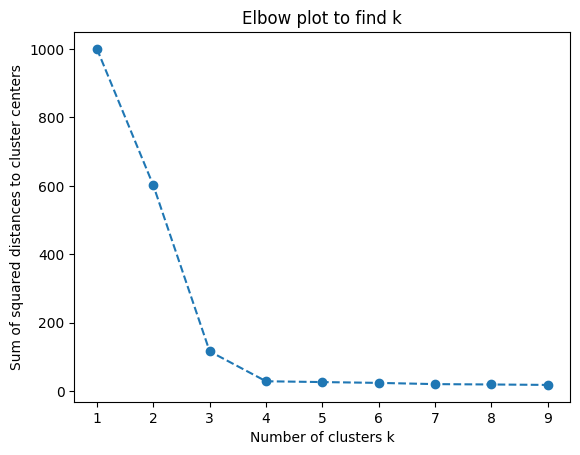

In [152]:
plt.plot(clusters, sum_squared_distances, '--o')
plt.xlabel("Number of clusters k")
plt.ylabel("Sum of squared distances to cluster centers")
plt.title("Elbow plot to find k");

In [160]:
pd.Series(sum_squared_distances).diff()[1:]

# k = 3

1   -398.734497
2   -485.169824
3    -87.308740
4     -2.376996
5     -2.385266
6     -3.577940
7     -1.062208
8     -1.292691
dtype: float64

### Silhouette score
 silhouette score is a measure of cluster tightness

The silhoutte coefficient $S_i$ is calculated as 
$$S_i = \frac{b_i-a_i}{\max{\{a_i, b_i\}}}$$
,where 
- $a_i$ is mean distance between i and other points in the cluster it belongs to
- $b_i$ is the mean distance from i to clusters it doesn't belong to

Calculate average silhouette score for different $k$ clusters in the clustering algorithm, in this case KMeans. 

- silhouette coefficient is between -1 and 1
- value 1 -> very compact clusters
- value 0 -> overlapping clusters
- value -1 -> worst value

In [155]:
from sklearn.metrics import silhouette_score


kmeans= [KMeans(k, n_init= 'auto').fit(scaled_X) for k in clusters]
kmeans


[KMeans(n_clusters=1, n_init='auto'),
 KMeans(n_clusters=2, n_init='auto'),
 KMeans(n_clusters=3, n_init='auto'),
 KMeans(n_clusters=4, n_init='auto'),
 KMeans(n_clusters=5, n_init='auto'),
 KMeans(n_clusters=6, n_init='auto'),
 KMeans(n_clusters=7, n_init='auto'),
 KMeans(n_init='auto'),
 KMeans(n_clusters=9, n_init='auto')]

Text(0.5, 1.0, 'Silhouette plot')

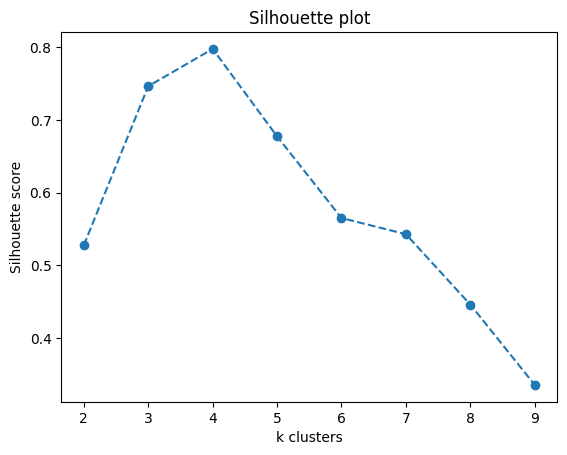

In [156]:
silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_list, "o--")
plt.xlabel("k clusters") 
plt.ylabel("Silhouette score")
plt.title("Silhouette plot")

# Visualization

In [161]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


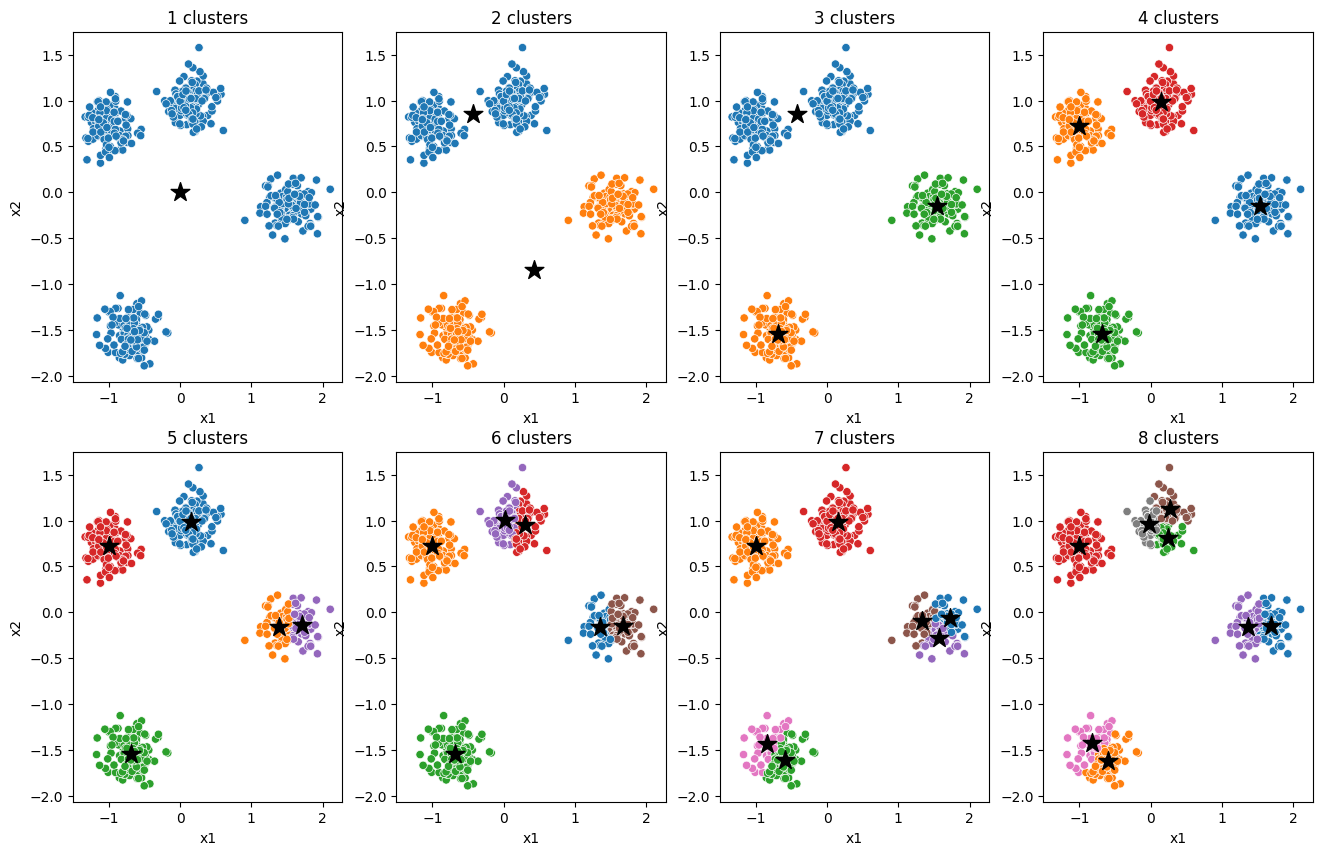

In [162]:

df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black"
    )

    ax.legend([], [], frameon=False)

    ax.set(title = f"{i+1} clusters")
    